# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [93]:
import pandas as pd
data= pd.read_csv('fitness_class_2212.csv')
print(data.head())
print(data.shape)
print(data.columns)
print(data.isnull().sum())
data1=data['weight'].mean()
print(data1)
data['weight'].fillna(data1, inplace=True)
print(data.isnull().sum())
print(data['booking_id'].unique())
print(data['days_before'].unique())
data['days_before'] = data['days_before'].str.extract(r'(\d+)').astype(int)
print(data['days_before'].unique())
print(data['day_of_week'].unique())
data["day_of_week"] = data["day_of_week"].str.replace("Monday","Mon",regex=False)\
.str.replace("Wednesday","Wed",regex=False)\
.str.replace(".","",regex=False)\
.str.strip()
data['day_of_week']=data['day_of_week'].astype('category')
data['day_of_week'] = data["day_of_week"].cat.reorder_categories(new_categories = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)
print(data['day_of_week'].unique())
data['time']=data['time'].astype('category')
data['time'] = data["time"].cat.reorder_categories(new_categories = ['AM','PM'],ordered=True)
print(data['time'].unique())
print(data['category'].unique())
data["category"] = data["category"].str.replace("-","unknown")
data["category"] = data["category"].astype('category')
print(data['category'].unique())
print(data['attended'].unique())
data['attended'] = data['attended'].astype('bool')
print(data.dtypes)
print(data.shape)



   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]
(1500, 8)
Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64
82.61037837837839
booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64
[   1  

## Task 1 
The dataset contains 1500 rows and 8 columns with missing values before cleaning. For each column, I looked at the number of missing values, the unique values, and validated each Column Name against the criteria in the dataset:
- booking_id: Same as description and has no missing values.
- months_as_member: Same as description and has no missing values. The number of months should be more than 1 and that is the case in this dataset.
- weight: Has 20 missing values. I replaced the missing values with the mean column weight which is 82.61037837837839. Weight should be more than 40 which it is.
- days_before: There is no missing value. However, the column has inconsistenst values. There are values that instead of just having days such as 8 and 2, have the word 'days' in them for instance: 13 days and 3 days. I extracted the numerical values from the entries with string values and then converted them to *int* data type. 
- day_of_week: Has no missing values. However, there is inconsistent formatting of the days of the week. Some days are mentioned in full format, others are abbreviated, while some are accompanied with a dot. I changed the inconsistent values to one form then converted the column values to a category data type.
- time: Same as description and has no missing values.The values entered are correct but not in the correct format,'object'. There are two unique values: PM and AM. I need to change the format to a correct data type, category data type.
- category: Has no missing values. There are 6 unique values. The value '-' is considered missing hence the reason I replace it with 'unknown'. I then convert the column to category data type.
- attended: Same as description and has no missing values. I convert the column to a boolean data type.

After the data validation, the dataset contains 1500 rows and 8 columns.

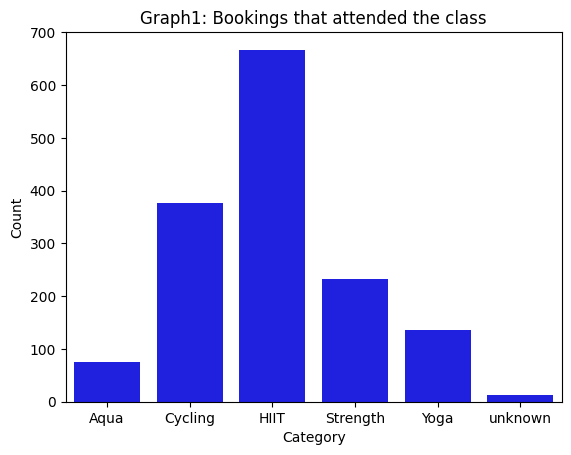

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
ax =  sns.countplot(data=data, x='category', color='blue')
ax.set(xlabel='Category', ylabel='Count', title='Graph1: Bookings that attended the class')
plt.show()
print(data['category'].value_counts())

## Task 2
From Graph1, 'HIIT' is the most attended class. followed by Cycling, Strength, Yoga, Aqua then unknown.
The distribution of the observations is not balanced since the number of occurence in each category varies significantly.
HIIT has the highest count of 667 whereas the UNKNOWN category has the lowest count of 13 hence indicating an unequal distribution of data across the categories.


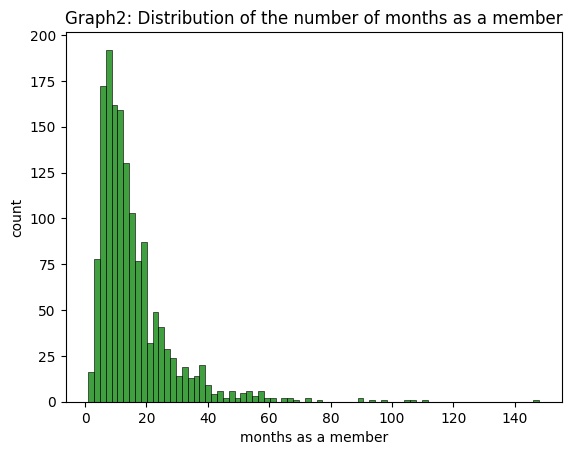

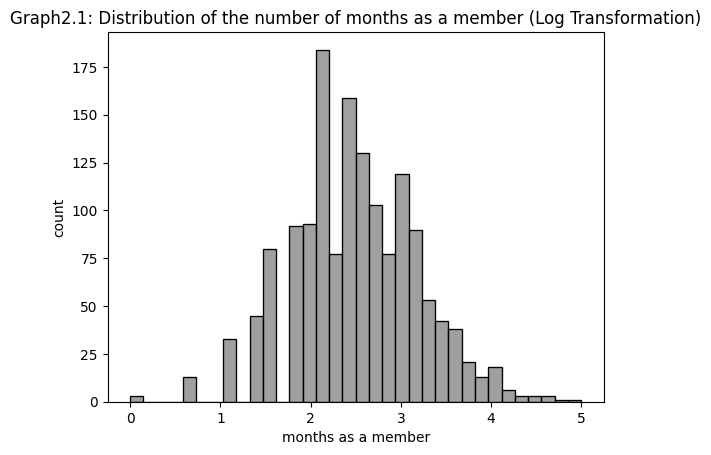

In [95]:
ax=sns.histplot(data=data, x='months_as_member', color='green')
ax.set(title='Graph2: Distribution of the number of months as a member', xlabel='months as a member', ylabel='count')
plt.show()
import numpy as np
ax=sns.histplot(data=data, x=np.log(data['months_as_member']), color='gray')
ax.set(title='Graph2.1: Distribution of the number of months as a member (Log Transformation)',
      xlabel='months as a member',
      ylabel='count')
plt.show()

## Task 3
From Graph2, the distribution of months as a member is positively skewed since the tail is more pronounced on the right side. There are also some observations on the extreme right side hence making us to carry out a logarithmic transformation. Logarithmic scaling compresses the wide range of observations as seen in graph2.

From Graph2.1, the distribution resembles a normal distribution.


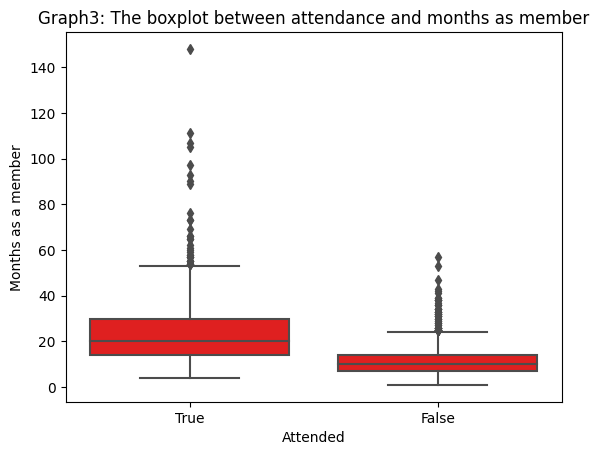

148


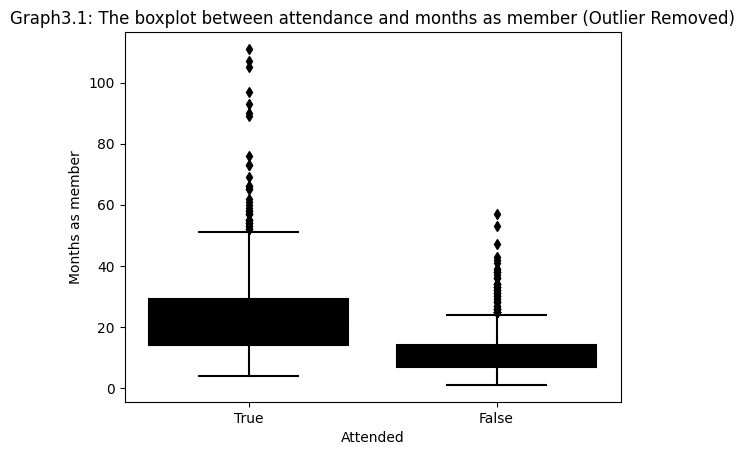

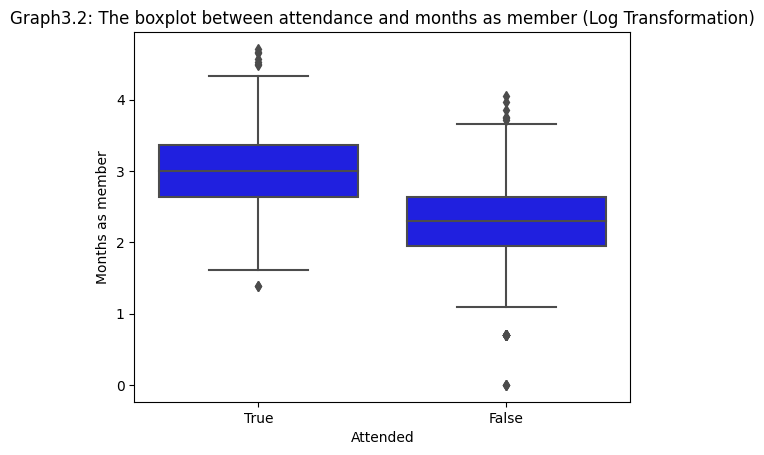

In [96]:
order = [True, False]
ax = sns.boxplot(data=data, x='attended', y='months_as_member', color='red', order=order)
ax.set(title='Graph3: The boxplot between attendance and months as member', xlabel='Attended', ylabel='Months as a member')
plt.show()
print(data['months_as_member'].max())
outlier = data['months_as_member'] == data['months_as_member'].max()
data = data[~outlier]
ax = sns.boxplot(data=data, x='attended', y='months_as_member', color='black', order=[True, False])
ax.set(title='Graph3.1: The boxplot between attendance and months as member (Outlier Removed)', 
       xlabel='Attended', ylabel='Months as member')
plt.show()
order = [True, False]
ax = sns.boxplot(data=data, x='attended',y=np.log(data['months_as_member']),color='blue', order=order)
ax.set(title='Graph3.2: The boxplot between attendance and months as member (Log Transformation)',xlabel='Attended',ylabel='Months as member')
plt.show()

## Task 4
From Graph3, the members who attended the fitness class are observed to stay longer than those who did not attend.

There is an observed outlier in the group that attended the class. The outlier membership lasted for 148 months.
In Graph3.1, the outlier was removed.

However, despite removing the extreme outlier, there are still significant outliers in the boxplot hence the reason I transformed the values of months_as_member into logarithmic values.

From Graph3.2, we see an improved visualization of the relationship between attendance and number of months as a member and the number of outliers is now small.

## Task 5
The type of machine learning problem is classification. The goal here is to predict whether members will attend the class or not. This involves assigning each member to one of the two classes: attended or not attended. Classification algorithms are designed to handle such multiclassification tasks where the objective is to learn a model that can accurately classify new instances based on their features.

Before performing the classification problem, I made some changes: I removed the 'booking_id' column since it has unique features and will therefore be irrelevant in the model. For the categorical variables, I changed them to dummy variables. I also applied log transformation to the 'months_as_member' column.

After this data validation, the dataset has 1498 rows and 19 columns.

In [97]:
data1= data.drop(columns='booking_id')
data1['months_as_member'] = np.log(data1['months_as_member'])
categorical_cols= data1.select_dtypes(include='category').columns.to_list()
data1=pd.get_dummies(data1, columns=categorical_cols, drop_first=False)
print(data1.head())
print(data1.shape)

   months_as_member  weight  ...  category_Yoga  category_unknown
0          2.833213   79.56  ...              0                 0
1          2.302585   79.01  ...              0                 0
2          2.772589   74.53  ...              0                 0
3          1.609438   86.12  ...              0                 0
4          2.708050   69.29  ...              0                 0

[5 rows x 19 columns]
(1499, 19)


## Task 6
 The baseline model I am using is Logistic Regression Model. I used 70% of the data to create a training set.

In [98]:
# Start coding here.
from sklearn.model_selection import train_test_split
X=data1.drop(columns='attended')
y=data1['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
# Initialize and fit the logistic regression model
lr= LogisticRegression()
lr.fit(X_train, y_train)
# Predict on the test set
pred_lr = lr.predict(X_test)


## Task 7
The Comparison model I am using is Random Forest model

In [99]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and fit the Random Forest Classifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
# Predict on the test set
pred_rfc = rfc.predict(X_test)

## Task 8
I chose the **Logistic Regression model** as the baseline model since it is a simple and interpretable model that can handle binary classification tasks.

I chose the **Random Forest Model** as the classification model since it is an ensemble model that combines multiple decision trees to make predictions. Random Forest Classifier Model is also known for its ability to handle complex relationships in the data and provide a good performance.

## Task 9
I am choosing **accuracy_score** since it provides a straightforward and intuitive way to measure a model's overall performance. It is also a convenient metric due to its simplicity and ease of communication.

In [100]:
from sklearn.metrics import accuracy_score
logistic_accuracy = accuracy_score(y_test, pred_lr)
print("Logistic Regression Model Accuracy:", logistic_accuracy)

random_forest_accuracy = accuracy_score(y_test, pred_rfc)
print("Random Forest Model Accuracy:", random_forest_accuracy)


Logistic Regression Model Accuracy: 0.7466666666666667
Random Forest Model Accuracy: 0.7355555555555555


## Task 10
The Logistic Regression Model performs slightly better than the Random Forest Model because  the Logistic Regression Model has a higher accuracy therefore indicating that it made more correct predictions compared to Random Forest Model.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam